Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". (After you have done that, you can delete the 'raise NotImplementedError()' line, and then run your code to check that it works).

Also, enter your NAME in the next cell.


In [1]:
NAME = "Balvi"

---

# ICT706 SouthBank 2020 Semester 1 Task 2

This assignment will be done completely inside this Jupyter notebook.

### Background
A medium-size company has given you one year of data about the online purchases that their customers have made.  They want you to analyse the data using statistical and machine learning techniques and produce:
* a prediction algorithm for predicting how much money each customer is likely to spend in a year;
* a classification algorithm for predicting which customers will be 'big spenders';
* some recommendations on what marketing strategy they should use to attract more 'big spender' customers.

### Instructions
Follow all the instructions in this notebook to complete these tasks.  Note that some cells contain 'assert' statements - these will automatically mark your work so that you can check that you have done the preceeding steps correctly.  (If they give errors, then go back and correct your previous work until you fix those errors.  Once those 'assert' cells execute without errors, you know that you have achieved the marks for that step.) 

When you have finished, this notebook is the only file that you will need to submit to Blackboard.

Note: If you want some space to try out some Python code of your own, feel free to add extra cells into this notebook.  Just make sure that before you submit your notebook, that those extra cells execute without error, or that you delete them before submitting.

### Overview
You have five sections to complete in this Notebook (total = 100 marks):
* Part A: Load and Clean Data (20 points)
* Part B Data Exploration (30 points)
* Part C: Predicting Spending Levels (20 points)
* Part D: Predicting Big Spenders (20 points)
* Part E: Business Recommendations (10 points)

In [2]:
# add all your imports here.
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

---
# Part A: Load and Clean Data (20 points)

Save your CSV data file into the same folder as this notebook.

Write Python code to load your dataset into a Pandas DataFrame called 'sales'.

In [3]:
# loading dataset into dataframe
sales = pd.read_csv("GreenHat_Sales.csv")

After you have loaded the data correctly, you should have 10,000 rows. 
Run the following cells and tests to check that you have done this correctly.

In [4]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$1660.80
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$3041.10
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40


In [5]:
"""Check that 'sales' has the right shape and number of rows (5 points)."""
assert len(sales.columns) == 10
assert sales.columns[0] == "CustNum"
assert sales.shape == (10000, 10)

## Cleaning the Data

Some of the columns are strings, with dollar signs.  But we need to convert them to numbers (float) so that we can do calculations on them.  The next cell shows what will go wrong if we try doing calculations *before* converting them floats!

In [6]:
s2 = sales["Spend"] * 4
s2.head()

0    $1615.00$1615.00$1615.00$1615.00
1    $1927.20$1927.20$1927.20$1927.20
2    $1660.80$1660.80$1660.80$1660.80
3    $3041.10$3041.10$3041.10$3041.10
4    $1764.40$1764.40$1764.40$1764.40
Name: Spend, dtype: object

In [7]:
# Complete the following remove_dollar function 
# so that it removes any dollar signs and spaces
# and then returns the string as a number (float).
def remove_dollar(s):
    """Removes dollar signs and spaces from s.
    Returns it as a float.
    """
    # YOUR CODE HERE
    return float(s.replace("$", "").replace(" ", ""))  # removing spaces, symbols and converting into float

In [8]:
"""Check that remove_dollar() removes dollars and spaces properly (5 points)."""
assert remove_dollar("12") == 12.0
assert remove_dollar("$123") == 123.0
assert remove_dollar("  $1234") == 1234.0
assert remove_dollar(" $42.3 ") == 42.3

## Clean up the Spend columns

Apply your remove_dollar function to the "Spend" column (every row), and put the cleaned-up float values into a new column of your 'sales' DataFrame called **"SpendValue"**.

Then do the same for the "LastSpend" column and put the float values into a new column called **"LastSpendValue"**.

In [9]:
# YOUR CODE HERE
sales["SpendValue"] = sales["Spend"].apply(remove_dollar)  # applies the remove_dollar function to each row
sales["LastSpendValue"] = sales["LastSpend"].apply(remove_dollar)

In [10]:
sales.dtypes

CustNum             int64
Name               object
Sex                object
Age                 int64
State              object
Income              int64
Clicks              int64
LastSpend          object
Purchases           int64
Spend              object
SpendValue        float64
LastSpendValue    float64
dtype: object

In [11]:
# check the new SpendValue columns (5 points)
assert sales.columns.contains("SpendValue")
assert sales.columns.contains("LastSpendValue")
# check that they are floats
assert sales["SpendValue"].dtype == "float64"
assert sales["LastSpendValue"].dtype == "float64"
# check that the values are greater than zero.
assert (sales["SpendValue"] > 0.0).all()
assert (sales["LastSpendValue"] >= 0.0).all()

## Make Sex and State numeric

To use the Sex and State columns as input features for the machine learning algorithms in Scikit-Learn they must be numeric.

Use the **LabelEncoder** object from the sklearn.preprocessing package to convert the 'Sex' column into an integer column called **"SexValue"**.  

Also convert the "State" column into a integer column called **"StateValue"**. 

In [12]:
# YOUR CODE HERE
le = LabelEncoder()  # label encoder labels different types to integer
le.fit(sales['Sex'])
sales["SexValue"] = le.transform(sales['Sex'])

le = LabelEncoder()
le.fit(sales['State'])
sales["StateValue"] = le.transform(sales['State'])

In [13]:
# see if Sex has been mapped to ints properly?
cols = ["Name", "Sex", "SexValue"]
sales[cols].head()

,Name,Sex,SexValue
0,Brandon Bender,male,1
1,Andre Mccormick,male,1
2,Ashley Smith,female,0
3,Ann Riley,female,0
4,Timothy Chavez,male,1


In [14]:
# see if State has been mapped to ints properly?
cols = ["Name", "State", "StateValue"]
sales[cols].head(10)

,Name,State,StateValue
0,Brandon Bender,NSW,1
1,Andre Mccormick,VIC,6
2,Ashley Smith,NSW,1
3,Ann Riley,NSW,1
4,Timothy Chavez,NSW,1
5,John Bennett,VIC,6
6,Teresa Wise,QLD,3
7,Andrew Nelson,QLD,3
8,Jon Aguilar,NSW,1
9,Priscilla Briggs,NSW,1


In [15]:
# test the new SexValue and StateValue columns (5 points)
assert sales.columns.contains("SexValue")
assert sales.columns.contains("StateValue")
# check that they are integer
assert str(sales["SexValue"].dtype).startswith("int")   # "int32" or "int64"
assert str(sales["StateValue"].dtype).startswith("int") # "int32" or "int64"
# check that the values are greater than zero.
assert sales["SexValue"].max() == 1    # 0 and 1 only
assert sales["StateValue"].max() == 7  # 7 states in Australia

In [16]:
# Finally, let us view just the numeric columns.
numcols = ["CustNum", "SexValue", "Age", "StateValue",
           "Income", "Clicks", "Purchases", "SpendValue"]
sales[numcols].head()

,CustNum,SexValue,Age,StateValue,Income,Clicks,Purchases,SpendValue
0,0,1,67,1,120000,709,8,1615.0
1,1,1,38,6,140000,630,14,1927.2
2,2,0,47,1,50000,554,8,1660.8
3,3,0,33,1,100000,309,10,3041.1
4,4,1,49,1,140000,520,8,1764.4


---

# Part B Data Exploration (30 points)

In this section, you will explore the data statistically and visually, to get a feel for what kinds of data you have, and how much people are spending on your web site.

## B.1 Data Inspection

Start by using the Pandas **describe()** function to analyse all the numeric columns of your 'sales' DataFrame.  Spend some time looking at this and making sure that you understand the average (mean) and range (min and max) of each column.

In [17]:
# YOUR CODE HERE
sales.describe()

,CustNum,Age,Income,Clicks,Purchases,SpendValue,LastSpendValue,SexValue,StateValue
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,4999.50000,44.388500,80260.000000,501.40390,8.45270,1898.661955,2024.320991,0.50590,3.015300
std,2886.89568,16.796832,42091.918143,289.59793,4.96355,1187.795229,1855.160796,0.49999,2.235434
min,0.00000,16.000000,20000.000000,0.00000,1.00000,320.800000,0.000000,0.00000,0.000000
25%,2499.75000,30.000000,40000.000000,251.00000,5.00000,984.850000,641.597500,0.00000,1.000000
50%,4999.50000,44.000000,80000.000000,502.00000,7.00000,1627.750000,1447.640000,1.00000,3.000000
75%,7499.25000,59.000000,120000.000000,753.00000,11.00000,2500.000000,2877.345000,1.00000,6.000000
max,9999.00000,73.000000,160000.000000,1000.00000,24.00000,5880.000000,11676.310000,1.00000,7.000000


### Data Inspection Questions

In the next cell, write your observations about the "SpendValue" and "Purchases" columns.  For each column, say what the average value is and discuss what that means in terms of your sales to an average person.  Also discuss the min and max values.  

Based on the "SpendValue" column, explain how much your "big spenders" (the top 25% percent of your clients) are spending each year.  This will be a range of values, such as from 1000 to 2000 dollars.

Your discussion must all be in the next cell.  

Add three level-2 headings in that cell to break your discussion into topics: "Purchases column", "SpendValue column", and "Big Spenders".

### Answer:

## Purchases Column
The mean or average value of the column is 8.45. The minimum number of purchase is 1. That means each customer made above 8 purchases in average and usually they do that throughout the year. Also they made at least 1 purchase from any state during the time. The highest amount of purchase by any customer is 24 times per year which significantly increases the total spending value.

## SpendValue Column
The mean of the column is 1898.66, meaning, each customer had spent around 1898 dollars last year. The minimum amount they spent is 320.80 dollars and the maximum is 5880 dollars. 

## Big Spenders
The big spenders will be determined based on the amount each customers have spent last year. The cut off dollar will decide the customer is a big spender or not. This cut off amount is determined by the spending value of the customers who has spent more than most of the customers. For that, we can calculate top 25% of them, who are spending more. The top 25% spending customers are in 75th quantile. As we can see in the description, 75% people are spending at least 2500 dollars per year. That is the cutoff in our case. And the spending value by the big spenders will be in a range of 2500 to 5880 dollars.

## B.2 Differences between States

We want to know where most of our customers live and whether customers from certain areas spend more or less than average.  Write some Pandas code to calculate and display the total **number of customers** in each Australian state (NSW, QLD, VIC, etc.) and their average **SpendValue**.  

Hint: you could do this by *grouping* your 'sales' table, or by *looping* through all the states, or several other ways.

In [18]:
# YOUR CODE HERE
Customer_sales_by_state = sales.groupby('State')['State', 'SpendValue'].agg(['count', 'mean'])
Customer_sales_by_state.columns = ['Number of Customers', 'Average Spend Value']
Customer_sales_by_state

,Number of Customers,Average Spend Value
State,,
ACT,311,1840.961576
NSW,4341,1925.515296
NT,75,1804.832000
QLD,1656,1868.604952
SA,652,1917.823850
TAS,161,1874.114907
VIC,2347,1887.506604
WA,457,1845.765317


### Graphical Comparison of States

Now *graph* your results, so that you can see them visually.

NOTE: since the states in Australia have very different populations, you should also calculate and graph the number of customers *relative* to the population of each state (you can use Google to find populations of each state).

So you should show at least the following three graphs:
* the absolute number of customers in each state;
* the number of customers in each state as a percentage of the population of that state;
* the average SpendValue of customers in each state (dollars/customer).

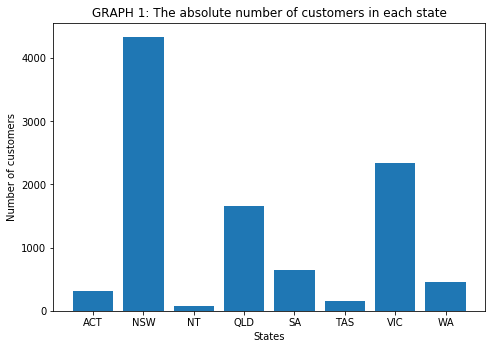

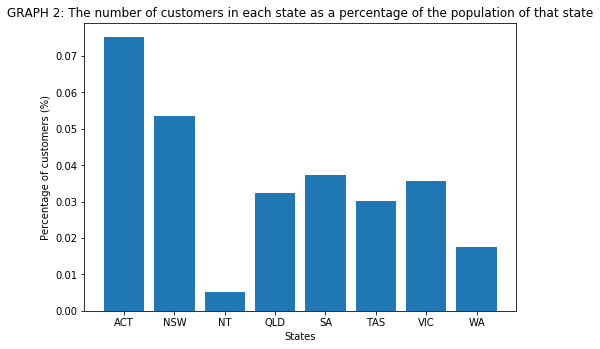

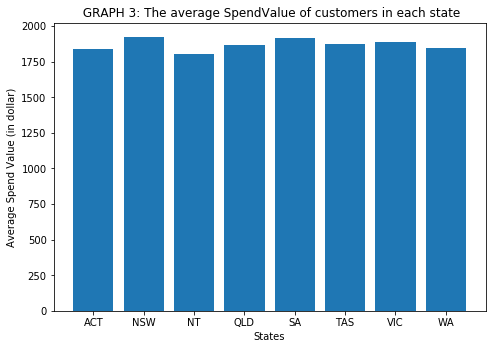

In [19]:
# YOUR CODE HERE

# plots the figure
def plot_figure(x, y, x_label, y_label, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title) 
    plt.show()
    
# index of the dataframe
states = Customer_sales_by_state.index.values

## GRAPH 1: The absolute number of customers in each state
number_of_customers = Customer_sales_by_state['Number of Customers']
plot_figure(x=states, y=number_of_customers, x_label='States', y_label='Number of customers', title='GRAPH 1: The absolute number of customers in each state')


## GRAPH 2: The number of customers in each state as a percentage of the population of that state
population_list = [412576, 8089526, 1419630, 5095100, 1751693, 534281, 6594804, 2621680]  # population of each state, found from google
number_of_customers = Customer_sales_by_state['Number of Customers']
customer_percentage = []

for customers, population in zip(number_of_customers, population_list):
    customer_percentage.append((customers / population) * 100)  # calculating population percentage for each state

plot_figure(x=states, y=customer_percentage, x_label='States', y_label='Percentage of customers (%)', title='GRAPH 2: The number of customers in each state as a percentage of the population of that state')

## GRAPH 3: The average SpendValue of customers in each state (dollars/customer)
average_spending = Customer_sales_by_state['Average Spend Value']
plot_figure(x=states, y=average_spending, x_label='States', y_label='Average Spend Value (in dollar)', title=' GRAPH 3: The average SpendValue of customers in each state')


### Question:
Discuss these graphs and explain your conclusions.

For example, are there *significant* differences in the average spend in different states?  Are our customer spread evenly across Australia, or concentrated in particular areas? 

Write your answer in the next cell, and give reasons for your conclusions.

### Answer:

The spending average of overall Australian customers is 1898.66 dollars. So we can say from the graph, customers are spending evenly accross Australia. Though the number of customers are not same in each state, meaning that customers are spending above average from the states having low number of customers. Less than 1% of the population are purchasing which should be improved. So that, the average spending amount will be higher.

---

# Part C: Predicting Spending Levels (20 points)

Using the LinearRegression function from the Scikit-Learn library (**sklearn**), build a machine learning model for predicting the expected **SpendValue** for a customer.  

Measure the performance of your model using 10-fold cross-validation with a test set size of 20% and print various measures of how accurate your predictions are.

In [20]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend,SpendValue,LastSpendValue,SexValue,StateValue
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00,1615.0,2488.59,1,1
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20,1927.2,4295.34,1,6
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$1660.80,1660.8,1986.09,0,1
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$3041.10,3041.1,1532.64,0,1
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40,1764.4,2082.08,1,1


In [21]:
# YOUR CODE HERE
x_cols = ['SexValue', 'Age', 'StateValue', 'Income', 'Clicks', 'Purchases', 'LastSpendValue']
y_col = 'SpendValue'

x = sales[x_cols]  # x contains the inputs or features
y = sales[y_col]  # contains the targetted output

model = LinearRegression().fit(x, y)  # fitting linear regression model with inputs and outputs

cv = ShuffleSplit(n_splits=10, test_size=0.2)  # 10 fold split with 20% of dataset for cross validation
scores = cross_val_score(model, x, y, cv=cv)  # predicting accuracy
predicted = cross_val_predict(model, x, y, cv=10)

print(scores)

[0.88089629 0.8761609  0.88648726 0.88018756 0.88790474 0.88351399
 0.88205364 0.88369148 0.88198363 0.88349247]


### Analysis of Results

Print out the linear regression coefficients for all the input features, so that you can see which ones are more significant and which ones are unimportant.  

Hint 1: Since the scale of the input features is so different (0-1 for sex, 0-160000 for income, etc) multiply the linear regression coefficients by the average value of the corresponding column, to see how many dollars that column contributes to the total predicated-spend answer.

Hint 2: Could you graph the predicted and actual spendvalues of the test data, to visually see how good the linear regression results are?

                       means  Model Coefficiet  Contribution
SexValue            0.505900      -1205.823778   -610.026249
Age                44.388500          0.195158      8.662788
StateValue          3.015300         -0.491914     -1.483270
Income          80260.000000          0.022514   1806.963897
Clicks            501.403900         -0.047708    -23.920889
Purchases           8.452700         -3.701996    -31.291865
LastSpendValue   2024.320991          0.007065     14.302710


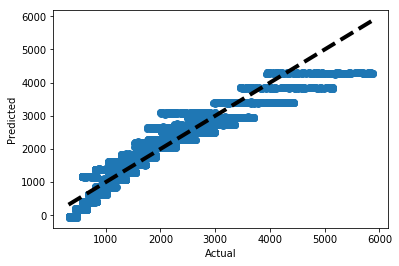

In [22]:
column_coef = pd.DataFrame()
col_means = sales[x_cols].mean()  # getting means for each row
column_coef["means"] = col_means

coef_list = []
contribution_list = []

for coef, col_mean, index in zip(model.coef_, col_means, column_coef.index.values):
    coef_list.append(coef)
    contribution_list.append(coef * col_mean)  # calculating contributions for each column
    
column_coef["Model Coefficiet"] = coef_list
column_coef["Contribution"] = contribution_list

print(column_coef)

# ploting predicted vs actual label graph to show how the model performed
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Discussion:

Discuss your conclusions about this linear regression model (in the next cell).  Which input features are most significant?

### Answer:
From the predicted vs actual graph, we can say that the model almost fitted perfectly. And the accuracy from 10 fold cross validation also suggested that the linear regression model can predict 88-89% of the time correctly, what should be the spending amount based on the input features. The input feature 'sex' and 'state' are the most significant as they contributed the most in changing the spending amount for each customer. Other factors like age and spedning of last time are also important. We can see, the people of average age are likely to spend more money. Also people who spent big amount last time, they are going to spend more.

---
# Part D: Predicting Big Spenders (20 points)

In this section we want to build some machine learning models predict if a new customer is likely to be a big spender or not.  This will be a binary outcome (yes or no), so we can use machine learning *classification* algorithms.

Remember that our definition of 'Big-Spender' is that it is a client whose annual spending level (**SpendValue**) is in the top 25% of our clients.  So the exact dollar cutoff for big spenders will be different for each student, as each of you are working for a different company and are using a different dataset.

Choose two classification algorithms.  Use each one to build and then evaluate a 'big-spender' prediction model.

In [23]:
# calculating dollar cutoff for top 25% spenders
cut_off = sales['SpendValue'].quantile(0.75)
sales['BigSpender'] = (sales['SpendValue'] > cut_off).astype(int)

print("Big Spender Dollar Cut off", cut_off)
print("Number of Big Spenders:", len(sales[sales['BigSpender'] == 1]))

# preparing data for classifiers
x_cols = ['SexValue', 'Age', 'StateValue', 'Income']
y_col = 'BigSpender'

x = sales[x_cols]  # inputs
y = sales[y_col]  # output
 
# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# FIRST CLASSIFIER: Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

score = logreg.score(X_test, y_test)
y_pred = logreg.predict(X_test)

print("Accuracy of Logistic Regression Classifier", score)


# SECOND CLASSIFIER: Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)

score = gnb.score(X_test, y_test)
print("Accuracy of Naive Bayes Classifier",score)

Big Spender Dollar Cut off 2500.0
Number of Big Spenders: 2496
Accuracy of Logistic Regression Classifier 0.756
Accuracy of Naive Bayes Classifier 0.793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Discussion:

Discuss your conclusions about your two classification models (in the next cell).

Which classification algorithm gives the more accurate results? 

How accurate are the results from your best classifier?

### Answer:
In our case, Naive Bayes classifer (Accuracy: 79.3%) performed better than Logistic Regression classifier (Accuracy: 75.6%). The Naive Bayes classifer can correctly predict almost 80 percent of the time by determing the probabilistic relationships between the input factors.  

---
# Part E: Business Recommendations (10 points)

The company you are doing this analysis for wants some recommendations from you about how to find new customers who are likely to be big spenders.  They are wondering if they should focus their advertising on a particular gender?  Or people in a given state, such as Victoria, or NSW?  Or aim at demographic groups who have high income level or medium income levels?  Or other strategies?  What recommendations will you give them?  

Write about 100 words describing your conclusions from your analysis, and your recommendations for the best strategy for attracting new big-spender customers.

## Recommendations:

1. They should focus their advertising on a particular gender because the experiments clearly shows that gender is the most significant contributor in increasing or decresing the sale. 

2. Also the number of customers accross different states are not even though the average spending is almost even, they should try to grab more attention of the new customers. To attract more people they should the average income, gender and age in each state, so that they can find the contributors in each state. The significance of input factors may vary in different states.